In [1]:
# Imports
import geopandas as gpd
import json

In [7]:
# Import des données
clc_gdf=gpd.read_file('/Users/camillemodeste/Documents/Workflow/Pyronear/hackathon-meteo-france/data/raw/CLC_RALPC_RGF_SHP/CLC90/CLC90_RALPC_RGF.shp')

In [8]:
clc_gdf

,ID,CODE_90,AREA_HA,geometry
0,FR-240007,313,108.723978,"POLYGON ((351406.997 6296746.350, 351337.944 6..."
1,FR-239963,242,32.977455,"POLYGON ((365361.455 6296511.932, 365336.206 6..."
2,FR-239961,131,39.955646,"POLYGON ((367498.207 6296387.799, 367325.083 6..."
3,FR-240020,211,337.036879,"POLYGON ((350973.105 6295364.470, 350921.276 6..."
4,FR-240042,211,93.187402,"POLYGON ((357770.931 6296173.845, 357769.991 6..."
...,...,...,...,...
50877,FR-190531,511,7692.949069,"POLYGON ((410382.873 6451072.339, 410668.921 6..."
50878,FR-221763,211,51806.789583,"MULTIPOLYGON (((475686.924 6320614.134, 475658..."
50879,FR-234192,211,4.733194,"POLYGON ((457792.073 6313578.130, 457766.841 6..."
50880,FR-132238,231,419.384661,"MULTIPOLYGON (((380750.264 6591988.248, 380657..."


In [9]:
# Ajout de la légende sur le CODE_90 :
clc_legend_file = open('/Users/camillemodeste/Documents/Workflow/Pyronear/hackathon-meteo-france/src/utils/clc_legende.json')
clc_legend_str = clc_legend_file.read()
clc_legend_data = json.loads(clc_legend_str)
clc_legend_data

{'111': 'Tissu urbain continu',
 '112': 'Tissu urbain discontinu',
 '121': 'Zones industrielles ou commerciales et installations publiques',
 '122': 'Réseaux routier et ferroviaire et espaces associés',
 '123': 'Zones portuaires',
 '124': 'Aéroports',
 '131': 'Extraction de matériaux',
 '132': 'Décharges',
 '133': 'Chantiers',
 '141': 'Espaces verts urbains',
 '142': 'Equipements sportifs et de loisirs',
 '211': "Terres arables hors périmètres d'irrigation",
 '212': 'Périmètres irrigués en permanence',
 '213': 'Rizières',
 '221': 'Vignobles',
 '222': 'Vergers et petits fruits',
 '223': 'Oliveraies',
 '231': 'Prairies et autres surfaces toujours en herbe à usage agricole',
 '241': 'Cultures annuelles associées à des cultures permanentes',
 '242': 'Systèmes culturaux et parcellaires complexes',
 '243': 'Surfaces essentiellement agricoles, interrompues par des espaces naturels importants',
 '244': 'Territoires agroforestiers',
 '311': 'Forêts de feuillus',
 '312': 'Forêts de conifères',
 

In [10]:
# Ajout de la légende dans la gdf
clc_gdf_explicit = clc_gdf.replace({"CODE_90": clc_legend_data})
clc_gdf_explicit

,ID,CODE_90,AREA_HA,geometry
0,FR-240007,Forêts mélangées,108.723978,"POLYGON ((351406.997 6296746.350, 351337.944 6..."
1,FR-239963,Systèmes culturaux et parcellaires complexes,32.977455,"POLYGON ((365361.455 6296511.932, 365336.206 6..."
2,FR-239961,Extraction de matériaux,39.955646,"POLYGON ((367498.207 6296387.799, 367325.083 6..."
3,FR-240020,Terres arables hors périmètres d'irrigation,337.036879,"POLYGON ((350973.105 6295364.470, 350921.276 6..."
4,FR-240042,Terres arables hors périmètres d'irrigation,93.187402,"POLYGON ((357770.931 6296173.845, 357769.991 6..."
...,...,...,...,...
50877,FR-190531,Cours et voies d'eau,7692.949069,"POLYGON ((410382.873 6451072.339, 410668.921 6..."
50878,FR-221763,Terres arables hors périmètres d'irrigation,51806.789583,"MULTIPOLYGON (((475686.924 6320614.134, 475658..."
50879,FR-234192,Terres arables hors périmètres d'irrigation,4.733194,"POLYGON ((457792.073 6313578.130, 457766.841 6..."
50880,FR-132238,Prairies et autres surfaces toujours en herbe ...,419.384661,"MULTIPOLYGON (((380750.264 6591988.248, 380657..."


<Axes: >

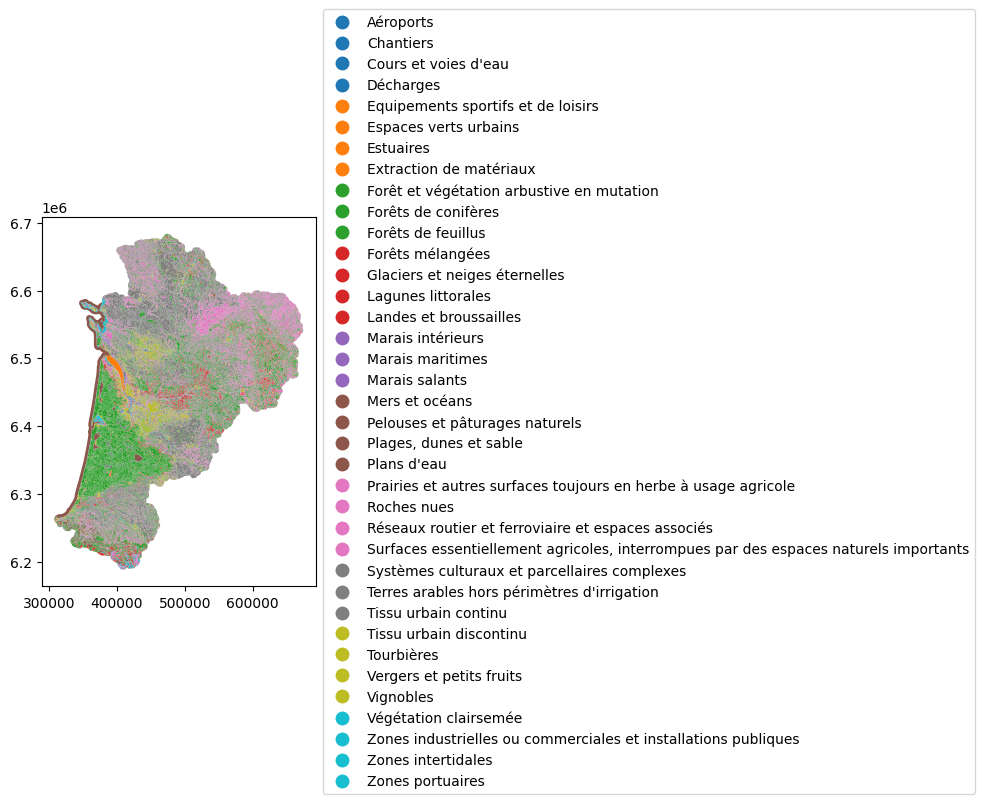

In [13]:
# Visualisation
clc_gdf_explicit.plot(column='CODE_90', legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})